## Practica 6
### Eduardo Leonel Sanchez Velasco
### NC: 420004035

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
from random import randint as rand
from skimage import io
from math import ceil, floor, sqrt, acos, cos, pi
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'



In [11]:
def plot_img(img, title):
    name, image = img
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.imsave('resultados/{}{}.jpg'.format(title,name),image)
    plt.title(name+ title)
    plt.imshow(image)
    plt.show()

def rgb_to_hsi(rgb_img):
    hsi_image = np.ones(rgb_img.shape)
    ### Canales RGB
    # Canal Rojo
    canal_rojo = rgb_img[:,:,0]
    # Canal Verde
    canal_verde = rgb_img[:,:,1]
    # Canal Azul
    canal_azul = rgb_img[:,:,2]
    y_space, x_space = canal_rojo.shape
    for y in range(y_space):
        for x in range(x_space):
            numerador = 0.5 * ((canal_rojo[y][x] - canal_verde[y][x]) + 
                               (canal_rojo[y][x] - canal_azul[y][x]))
            denominador = sqrt((canal_rojo[y][x] - canal_verde[y][x])**2 + 
                               ((canal_rojo[y][x] - canal_azul[y][x])*(canal_verde[y][x] - 
                                                                       canal_azul[y][x])))
            if (denominador != 0):
                theta = acos(numerador/denominador)
            else:
                theta = 2*pi
            if (canal_azul[y][x] > canal_verde[y][x]):
                hsi_image[y][x][0] =  2*pi - theta
            else: 
                hsi_image[y][x][0] =  theta
            sum_canales = canal_rojo[y][x] + canal_verde[y][x] + canal_azul[y][x]
            canal_min = min(canal_rojo[y][x],canal_verde[y][x],canal_azul[y][x])
            hsi_image[y][x][1] = 1 - ((3/sum_canales)*canal_min)
            hsi_image[y][x][2] = sum_canales/3
    return hsi_image

def hsi_to_rgb(hsi_img):
    rgb_image = np.ones(hsi_img.shape)
    ### Canales RGB
    # Canal Rojo
    canal_h = hsi_img[:,:,0]
    # Canal Verde
    canal_s = hsi_img[:,:,1]
    # Canal Azul
    canal_i = hsi_img[:,:,2]
    y_space, x_space = canal_h.shape
    for y in range(y_space):
        for x in range(x_space):
            ## sectores
            #sector RG
            ecuacion1 = canal_i[y][x] * (1 - canal_s[y][x])
            
            
            
            if 0 <= canal_h[y][x] < (pi * 2/3):
                
                numerador = canal_s[y][x] * cos(canal_h[y][x])
                denominador = cos((pi/3)-canal_h[y][x])
                ecuacion2 = canal_i[y][x] * (1 + (numerador/denominador))
                ecuacion3 = 3*canal_i[y][x] - (ecuacion1 + ecuacion2)
                
                rgb_image[y][x][2] = ecuacion1
                rgb_image[y][x][0] = ecuacion2
                rgb_image[y][x][1] = ecuacion3
            elif  (pi*2/3) <= canal_h[y][x] < (pi*4/3):
                canal_h[y][x] = canal_h[y][x] - (pi*2/3)
                
                numerador = canal_s[y][x] * cos(canal_h[y][x])
                denominador = cos((pi/3)-canal_h[y][x])
                ecuacion2 = canal_i[y][x] * (1 + (numerador/denominador))
                ecuacion3 = 3*canal_i[y][x] - (ecuacion1 + ecuacion2)
                
                rgb_image[y][x][0] = ecuacion1
                rgb_image[y][x][1] = ecuacion2
                rgb_image[y][x][2] = ecuacion3
            elif (pi*4/3) <= canal_h[y][x] <= 2*pi:
                canal_h[y][x] = canal_h[y][x] - (pi*4/3)
                
                numerador = canal_s[y][x] * cos(canal_h[y][x])
                denominador = cos((pi/3)-canal_h[y][x])
                ecuacion2 = canal_i[y][x] * (1 + (numerador/denominador))
                ecuacion3 = 3*canal_i[y][x] - (ecuacion1 + ecuacion2)
                rgb_image[y][x][1] = ecuacion1
                rgb_image[y][x][2] = ecuacion2
                rgb_image[y][x][0] = ecuacion3
    return rgb_image

In [12]:
def multiples(value, length):
    return [value * i for i in range(1, length + 1)]

def pseudo_color(bw_image,color_levels, palette):
    size_y, size_x = bw_image.shape
    imagen_color = np.ones((size_y,size_x,3))
    paleta_colores = cm.get_cmap(palette, color_levels)
    lista_valores_map = multiples(1/color_levels,color_levels)
    for y in range(size_y):
        for x in range(size_x):
            for color in lista_valores_map:
                if bw_image[y][x] <= color:
                    imagen_color[y][x] = paleta_colores(lista_valores_map.index(color))[:-1]
                    break
    return imagen_color

#### Ejercicio 1

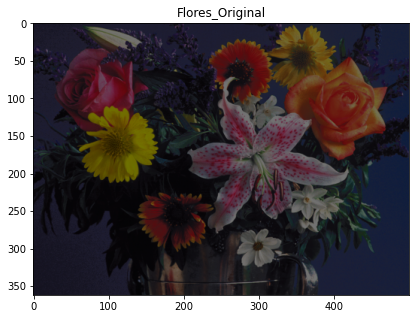

Dimensiones de la imagen:
(362, 500, 3)


In [13]:
flowers = io.imread("Imagenes/flowers2.bmp")/255.0
plot_img(('Flores_Original',flowers),'')

print("Dimensiones de la imagen:")
print(flowers.shape)

In [24]:
flowers_hsi = rgb_to_hsi(flowers)
flowers_hsi_ecualizada = np.clip(flowers_hsi,0,1)
np.max(flowers_hsi_ecualizada)

1.0

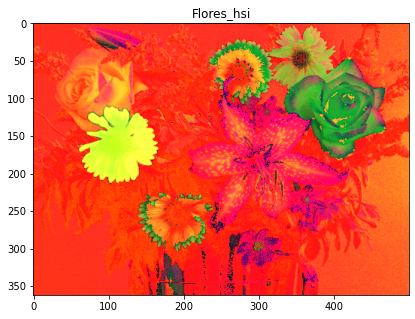

In [25]:
plot_img(('Flores_hsi',flowers_hsi_ecualizada),'')



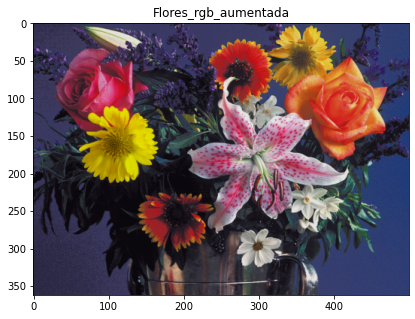

In [26]:
flowers_hsi[:,:,2] = flowers_hsi[:,:,2] * 2
flowers_rgb = hsi_to_rgb(flowers_hsi)
plot_img(('Flores_rgb_aumentada',flowers_rgb),'')


### Ejercicio 2

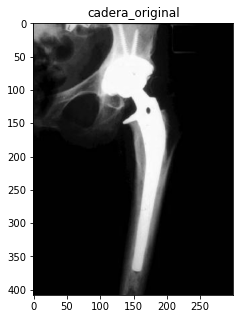

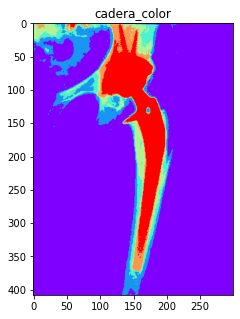

Dimensiones de la imagen:
(408, 300)


In [27]:
cadera = io.imread("Imagenes/cadera_1.jpg")/255.0
cadera = cadera[:,:,0]
cadera_color = pseudo_color(cadera,6,palette='rainbow')
plot_img(('cadera_original',cadera),'')

plot_img(('cadera_color',cadera_color),'')

print("Dimensiones de la imagen:")
print(cadera.shape)

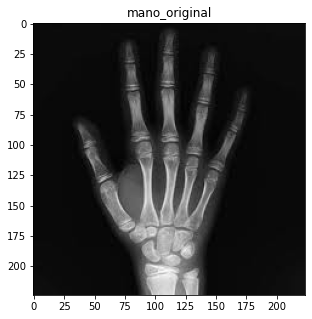

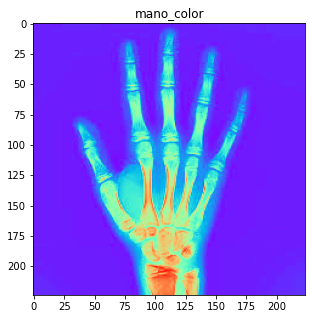

Dimensiones de la imagen:
(224, 224)


In [28]:
mano = io.imread("Imagenes/mano.jpeg")/255.0
mano = mano[:,:,0]
mano_color = pseudo_color(mano,200,'rainbow')
plot_img(('mano_original',mano),'')

plot_img(('mano_color',mano_color),'')
print("Dimensiones de la imagen:")
print(mano.shape)

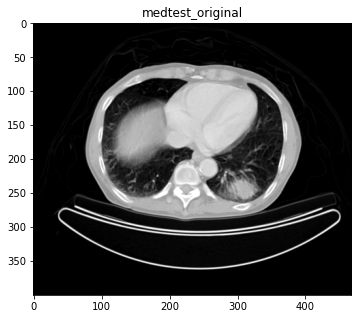

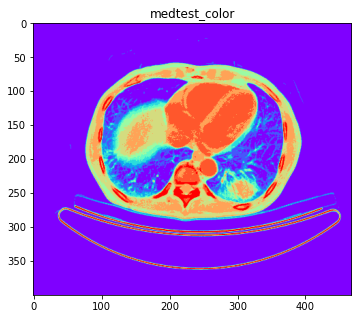

Dimensiones de la imagen:
(400, 468)


In [31]:
medtest = io.imread("Imagenes/medtest.png")/255.0
medtest_color = pseudo_color(medtest,10,'rainbow')
plot_img(('medtest_original',medtest),'')

plot_img(('medtest_color',medtest_color),'')
print("Dimensiones de la imagen:")
print(medtest.shape)

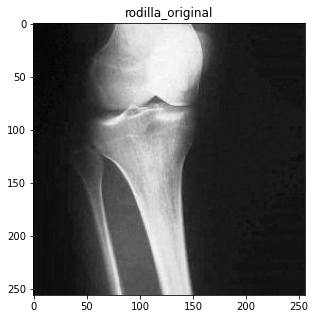

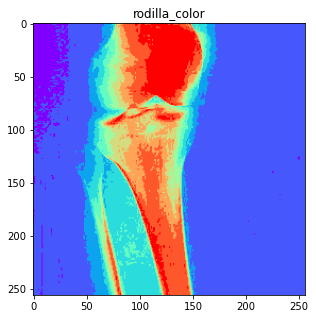

Dimensiones de la imagen:
(256, 256)


In [32]:
rodilla = io.imread("Imagenes/rodilla_1.jpg")/255.0
rodilla = rodilla[:,:,0]
rodilla_color = pseudo_color(rodilla,10,'rainbow')
plot_img(('rodilla_original',rodilla),'')

plot_img(('rodilla_color',rodilla_color),'')
print("Dimensiones de la imagen:")
print(rodilla.shape)